<a href="https://colab.research.google.com/github/AvaCook/cs315/blob/main/insertionPoC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ava Cook HW 4
Used ChatGPT to help with Ratio test and matplotlib visualization

In [13]:
import random
import time
import matplotlib.pyplot as plt

In [14]:

# Insertion sort implementation
def insertion(A, print_flag=False):
    n = len(A)
    for i in range(1, n):   # loop starts at index 1 (2nd element)
        key = A[i]
        j = i - 1
        # Shift elements of A[0..i-1] that are > key to the right
        while j >= 0 and A[j] > key:
            A[j+1] = A[j]
            j -= 1
        A[j+1] = key
        if print_flag:
            print(f"Step {i}: {A}")
    return A



In [15]:

# --- Data generation helper ---
def generate_input_list(n, randomize=True):
    if randomize:
        # Random data
        return [random.randint(1, 1000000) for _ in range(n)]
    else:
        # Already sorted data
        return list(range(1, n+1))

# Timing wrapper
def time_algorithm(algorithm, arr):
    start = time.time()
    algorithm(arr.copy())   # copy so input stays same
    end = time.time()
    return end - start

# Test sizes for Insertion Sort
Ns = [500, 1000, 2000, 4000, 8000]
times = []

for n in Ns:
    arr = generate_input_list(n, randomize=True)
    t = time_algorithm(insertion, arr)
    times.append(t)


N values: [500, 1000, 2000, 4000, 8000]
Times: [0.006871700286865234, 0.027418136596679688, 0.09797811508178711, 0.41251230239868164, 1.9980220794677734]
Ratios (T(2n)/T(n)): [3.9900076330580805, 3.573478260869565, 4.210249422070811, 4.843545435735249]


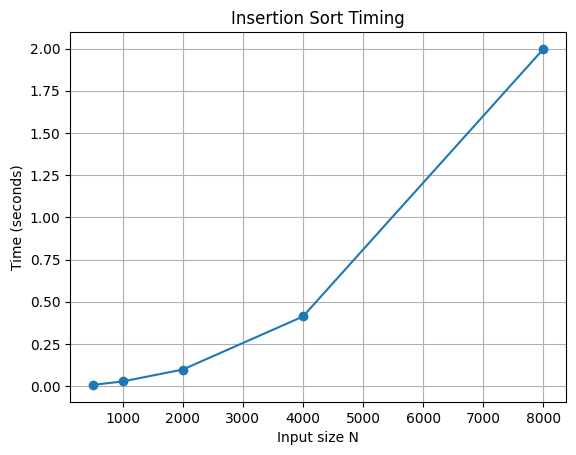

In [16]:


# Print results
print("N values:", Ns)
print("Times:", times)

# Ratio Test (expected ~4 since O(n^2))
ratios = []
for i in range(1, len(times)):
    ratios.append(times[i] / times[i-1])
print("Ratios (T(2n)/T(n)):", ratios)

# Plot
plt.plot(Ns, times, marker='o')
plt.xlabel('Input size N')
plt.ylabel('Time (seconds)')
plt.title('Insertion Sort Timing')
plt.grid(True)
plt.show()
